In [1]:
# Importing libraries

from imutils import paths
import imutils
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = "img/"


In [2]:
# Loading images

images = []
for image_name in os.listdir(path):
    curr_img = cv2.imread(path + image_name)
    curr_img = cv2.resize(curr_img, (0,0), None, 0.2, 0.2)
    images.append(curr_img)


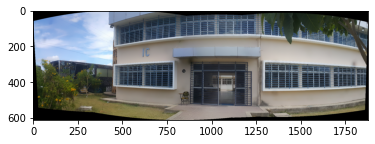

In [3]:
# Stitching

stitcher = cv2.Stitcher_create()
(status, result) = stitcher.stitch(images)

result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result_rgb)
plt.show()


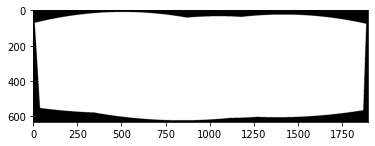

In [4]:
# Removing the black borders

stitched = cv2.copyMakeBorder(result, 10, 10, 10, 10,
           cv2.BORDER_CONSTANT, (0, 0, 0))
# convert the stitched image to grayscale and threshold it
# such that all pixels greater than zero are set to 255
# (foreground) while all others remain 0 (background)
gray = cv2.cvtColor(stitched, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]


plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)
plt.show()


In [5]:

# find all external contours in the threshold image then find
# the *largest* contour which will be the contour/outline of
# the stitched image
countours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
       cv2.CHAIN_APPROX_SIMPLE)
countours = imutils.grab_contours(countours)
c = max(countours, key=cv2.contourArea)
# allocate memory for the mask which will contain the
# rectangular bounding box of the stitched image region
mask = np.zeros(thresh.shape, dtype="uint8")
(x, y, w, h) = cv2.boundingRect(c)
cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)

#plt.imshow(mask, cmap='gray', vmin=0, vmax=255)
#plt.show()



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:

# create two copies of the mask: one to serve as our actual
# minimum rectangular region and another to serve as a counter
# for how many pixels need to be removed to form the minimum
# rectangular region
minRect = mask.copy()
sub = mask.copy()
# keep looping until there are no non-zero pixels left in the
# subtracted image
while cv2.countNonZero(sub) > 0:
    # erode the minimum rectangular mask and then subtract
    # the thresholded image from the minimum rectangular mask
    # so we can count if there are any non-zero pixels left
    minRect = cv2.erode(minRect, None)
    sub = cv2.subtract(minRect, thresh)

#plt.imshow(minRect, cmap='gray', vmin=0, vmax=255)
#plt.show()



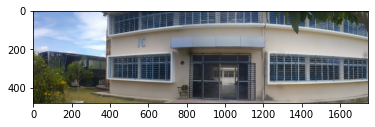

True

In [7]:

# find contours in the minimum rectangular mask and then
# extract the bounding box (x, y)-coordinates
countours = cv2.findContours(minRect.copy(), cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)
countours = imutils.grab_contours(countours)
c = max(countours, key=cv2.contourArea)
(x, y, w, h) = cv2.boundingRect(c)
# use the bounding box coordinates to extract the our final
# stitched image
stitched = stitched[y:y + h, x:x + w]

stiched_rgb = cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB)
plt.imshow(stiched_rgb)
plt.show()

# Saving stiched and cropped the image
cv2.imwrite('ic.jpg', stitched)